# Análisis de Caso: Inferencia e Intervalos de Confianza para la Media
**Empresa:** DataNova para Cadena de Supermercados   
**Objetivo:** Estimar el gasto medio semanal de los clientes frecuentes con un 95% de confianza.

### Datos Identificados:
* **Tamaño de muestra ($n$):** 60 clientes.
* **Gasto medio semanal ($\overline{x}$):** 132.50 USD.
* **Desviación estándar muestral ($s$):** 15.40 USD.
* **Nivel de confianza:** 95%.

### Elección de la Distribución
Para este análisis, se ha seleccionado la **distribución t-Student**. 
 
**Justificación:** 
1. La desviación estándar poblacional es desconocida.
2. Contamos únicamente con la desviación estándar de la muestra (s).
3. Aunque la muestra es grande (n=60), la distribución t-Student es la más adecuada cuando se estima la variabilidad poblacional a partir de una muestra.

RESULTADOS AL 95% DE CONFIANZA:
Valor t crítico: 2.0010
Intervalo: [128.52 USD, 136.48 USD]

RESULTADOS AL 99% DE CONFIANZA (PLUS +):
Valor t crítico: 2.6618
Intervalo: [127.21 USD, 137.79 USD]



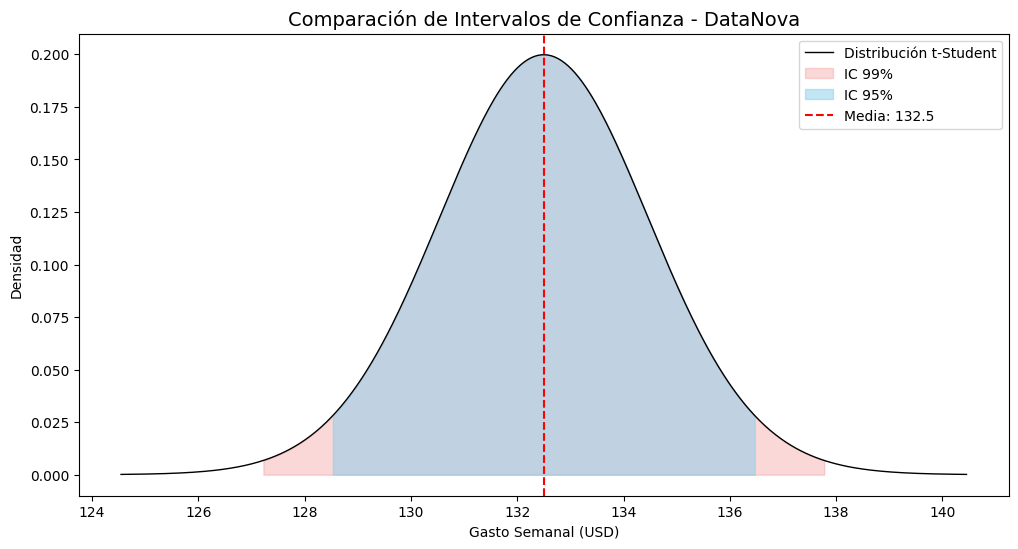

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datos del caso [cite: 18, 19, 20]
n = 60
media_muestral = 132.50
s = 15.40
df = n - 1 
error_estandar = s / np.sqrt(n)

# Función para calcular intervalos
def calcular_ic(conf):
    t_critico = stats.t.ppf((1 + conf) / 2, df)
    margen = t_critico * error_estandar
    return t_critico, media_muestral - margen, media_muestral + margen

# Cálculos para 95% y 99% [cite: 22, 35]
t95, inf95, sup95 = calcular_ic(0.95)
t99, inf99, sup99 = calcular_ic(0.99)

# --- RESULTADOS IMPRESOS ---
print(f"RESULTADOS AL 95% DE CONFIANZA:")
print(f"Valor t crítico: {t95:.4f}")
print(f"Intervalo: [{inf95:.2f} USD, {sup95:.2f} USD]\n")

print(f"RESULTADOS AL 99% DE CONFIANZA (PLUS +):")
print(f"Valor t crítico: {t99:.4f}")
print(f"Intervalo: [{inf99:.2f} USD, {sup99:.2f} USD]\n")

# --- VISUALIZACIÓN ---
x = np.linspace(media_muestral - 4*error_estandar, media_muestral + 4*error_estandar, 500)
y = stats.t.pdf(x, df, loc=media_muestral, scale=error_estandar)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'black', lw=1, label='Distribución t-Student')

# Sombras de intervalos
plt.fill_between(x, y, where=(x >= inf99) & (x <= sup99), color='lightcoral', alpha=0.3, label='IC 99%')
plt.fill_between(x, y, where=(x >= inf95) & (x <= sup95), color='skyblue', alpha=0.5, label='IC 95%')

plt.axvline(media_muestral, color='red', linestyle='--', label=f'Media: {media_muestral}')
plt.title('Comparación de Intervalos de Confianza - DataNova', fontsize=14)
plt.xlabel('Gasto Semanal (USD)')
plt.ylabel('Densidad')
plt.legend()

plt.savefig('analisis_datanova.png', dpi=300)
plt.show()

### Interpretación de Resultados 
* **Significado:** Tenemos un 95% de confianza en que el gasto promedio semanal de todos los clientes frecuentes se encuentra entre **128.52 USD** y **136.48 USD**.
* **Comparación (95% vs 99%):** Al aumentar la confianza al 99%, el intervalo se vuelve más ancho ($127.21 - 137.79$). Esto aumenta la certeza de capturar la media, pero disminuye la precisión de la estimación.

### Reflexión y Recomendación Ejecutiva 
Este análisis permite a la gerencia tomar decisiones basadas en evidencia:
1. **Presupuestos:** Se puede asegurar que el ingreso promedio por cliente no bajará de 128 USD con alta probabilidad.
2. **Estrategia Comercial:** Se recomienda diseñar promociones de "Gasto Mínimo" cercanas a los 130 USD, ya que es un valor estadísticamente representativo de la base de clientes.
3. **Utilidad:** La inferencia estadística transforma datos aislados en rangos de acción seguros, minimizando el riesgo financiero.